In [125]:
import import_ipynb
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np
from func import prep, rir

In [126]:
rocation = "../sound/25th_Huey_Helicopter_no_music_03.wav"
X_n, fs = prep(rocation, 16000)
source_to_err = rir([5, 4, 3], [1, 1, 1], [4, 3, 2]) # room_size, speaker_pos, mic_pos
loud_to_err  = rir([5, 4, 3], [2, 2, 2], [4, 3, 2]) # room_size, speaker_pos, mic_pos
print(len(loud_to_err))
print(len(source_to_err))
# parameters
filter_length = 1024
mu = 0.5

2509
2557


<string>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.


In [127]:
d_n = fftconvolve(X_n, source_to_err, mode='full')
W_z = np.zeros(filter_length)
x_prime = fftconvolve(X_n, loud_to_err, mode='full')
anti_noise_list = [0]*filter_length
X_n_buffer = np.flip(X_n[0:filter_length])

W_z = W_z.reshape(-1)
X_n_buffer = X_n_buffer.reshape(-1)
loud_to_err = loud_to_err.reshape(-1)
x_prime = x_prime.reshape(-1)

for i in range(len(X_n)-filter_length):
    y_n = np.sum(W_z * X_n_buffer * loud_to_err[:filter_length])
    anti_noise_list.append(y_n)
    e_n = d_n[i + filter_length] - y_n
    e_n =  np.asarray(e_n).reshape(-1)
    W_z = np.roll(W_z, 1)
    W_z[0] = W_z[1] + mu * x_prime[i + filter_length] * e_n

    X_n_buffer = np.roll(X_n_buffer, 1)
    X_n_buffer[0] = X_n[filter_length + i]

/tmp/ipykernel_2817/1715917548.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W_z[0] = W_z[1] + mu * x_prime[i + filter_length] * e_n


<function matplotlib.pyplot.show(close=None, block=None)>

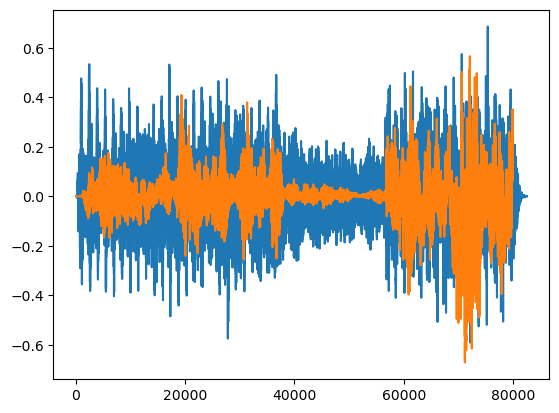

In [128]:
import matplotlib.pyplot as plt
plt.plot(d_n, label = "d(n)")
plt.plot(anti_noise_list, label = "anti")

plt.show